In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# You have a problem!

You are a **manager** of a multinational superstore selling different types of products.

You have noticed a **decrease in expected profit** in the recent quarter.

You want to **investigate** what is hapenning.

### Let's import our data

In [2]:
superstore_data = pd.read_csv('./data/superstore.csv')

In [3]:
superstore_data.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

Let's turn our columns' letters to lowercase and replace **"."** with **"_"**.

In [4]:
superstore_data.columns = superstore_data.columns.str.lower() # columns to lowercase
superstore_data.columns = superstore_data.columns.str.replace('.', '_')
superstore_data.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', '记录数', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

# You have a hypothesis

More than 30% of the company's profit is coming from the USA.
There must be a drop in sales there.

In [5]:
profit_by_country = superstore_data[['country', 'profit']]

In [6]:
profit_by_country = profit_by_country.groupby(by='country').sum().reset_index()
profit_by_country

,country,profit
0,Afghanistan,5460.30000
1,Albania,709.32000
2,Algeria,9106.50000
3,Angola,6494.97000
4,Argentina,-18693.79672
...,...,...
142,Venezuela,-11222.71044
143,Vietnam,-1870.23060
144,Yemen,-3706.45800
145,Zambia,7001.73000


In [7]:
profit_by_country = profit_by_country.sort_values(by='profit', ascending=False)
profit_by_country

,country,profit
139,United States,286397.0217
26,China,150683.0850
57,India,129071.8350
138,United Kingdom,111900.1500
44,France,109029.0030
...,...,...
96,Pakistan,-22446.6480
54,Honduras,-29482.3714
90,Netherlands,-41070.0750
94,Nigeria,-80750.7180


In [8]:
top_5_countries_by_profit = profit_by_country.head(5)
top_5_countries_by_profit

,country,profit
139,United States,286397.0217
26,China,150683.0850
57,India,129071.8350
138,United Kingdom,111900.1500
44,France,109029.0030


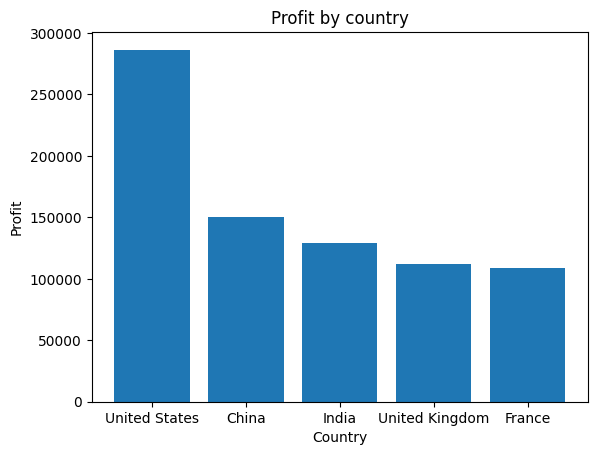

In [9]:
plt.bar(top_5_countries_by_profit.country, top_5_countries_by_profit.profit)
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Profit by country')
plt.show()

In [10]:
USA_profit = profit_by_country[profit_by_country.country == 'United States'].profit
total_profit = superstore_data.profit.sum()
USA_relative_share = (USA_profit / total_profit).iloc[0]

In [11]:
print(f'USA relative share: {USA_relative_share:.4f}')

USA relative share: 0.1952


Okay, but let's have a look at sales...

In [12]:
sales_by_country = superstore_data[['country', 'sales']]

In [13]:
sales_by_country

,country,sales
0,United States,19
1,United States,19
2,United States,21
3,United States,111
4,United States,6
...,...,...
51285,United States,69
51286,United States,9
51287,United States,12
51288,United States,90


In [14]:
sales_by_country = sales_by_country.groupby(by='country').sum().reset_index()

In [15]:
top_5_countries_by_sales = sales_by_country.sort_values(by='sales', ascending=False).head(5)
top_5_countries_by_sales

,country,sales
139,United States,2297354
6,Australia,925257
44,France,858930
26,China,700591
47,Germany,628857


In [16]:
top_5_countries_by_profit

,country,profit
139,United States,286397.0217
26,China,150683.0850
57,India,129071.8350
138,United Kingdom,111900.1500
44,France,109029.0030


Hmm, Australia seems to have a lot of revenue, but no profit...

In [17]:
Australia_profit = profit_by_country[profit_by_country.country == 'Australia'].profit.values
Australia_sales = sales_by_country[sales_by_country.country == 'Australia'].sales.values
Australia_profit_margin = Australia_profit / Australia_sales

In [18]:
print(f'Australia\'s profit margin {Australia_profit_margin}')

Australia's profit margin [0.11230116]


In [19]:
profit_by_country = profit_by_country.sort_values(by='country')
sales_by_country = sales_by_country.sort_values(by='country')

In [20]:
profit_margin = profit_by_country.profit.values / sales_by_country.sales.values

In [21]:
profit_margin[profit_margin >= 0].mean()

0.23406218840440465

# Conclusion

We established the following:
- yes, USA is a big contributer to our profit, but no problem constituted there
- Australia seems to have quite a lot of sales, but low profit margin (12% lower than the average)
- Australia is having costs issues
- we should adjust our policies in Australia